Problem 1

In [4]:
#a
import pandas as pd
data = pd.read_csv("COVIDincubation.txt")

In [6]:
symp_days_all = data['symp_days'].values
symp_days_below_40 = data[data['age'] <= 40]['symp_days'].values
symp_days_above_40 = data[data['age'] > 40]['symp_days'].values

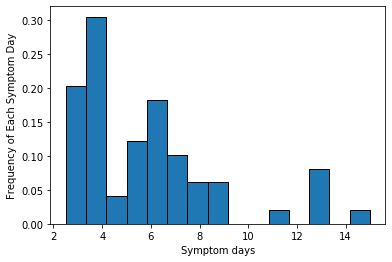

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(symp_days_all, bins=15, density=True, edgecolor='black')
plt.xlabel("Symptom days")
plt.ylabel("Frequency of Each Symptom Day")
plt.title("Histogram of Symptom Days for All Ages")
plt.show()

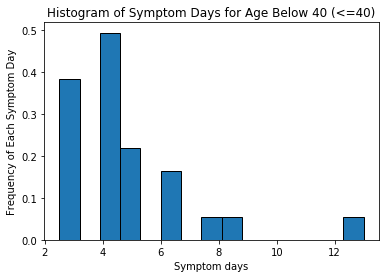

In [12]:
plt.figure()
plt.hist(symp_days_below_40, bins=15, density=True, edgecolor='black')
plt.xlabel("Symptom days")
plt.ylabel("Frequency of Each Symptom Day")
plt.title("Histogram of Symptom Days for Age Below 40 (<=40)")
plt.show()

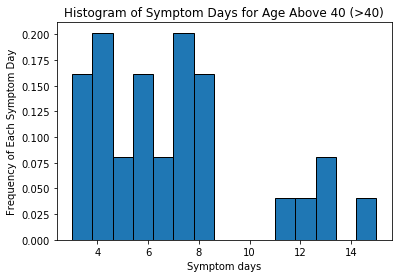

In [14]:
plt.figure()
plt.hist(symp_days_above_40, bins=15, density=True, edgecolor='black')
plt.xlabel("Symptom days")
plt.ylabel("Frequency of Each Symptom Day")
plt.title("Histogram of Symptom Days for Age Above 40 (>40)")
plt.show()

In [18]:
#b
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 500)

grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(symp_days_all.reshape(len(symp_days_all),1))

bandwidth_all = grid.best_params_['bandwidth']
print("My optimal bandwidth for KDE of all the sample data is {}.".format(bandwidth_all))

My optimal bandwidth for KDE of all the sample data is 0.8910453324821516.


In [20]:
grid.fit(symp_days_below_40.reshape(len(symp_days_below_40),1))
bandwidth_below_40 = grid.best_params_['bandwidth']
print("My optimal bandwidth for KDE for individual of age <= 40 is {}.".format(bandwidth_below_40))

My optimal bandwidth for KDE for individual of age <= 40 is 1.6233824316122782.


In [21]:
grid.fit(symp_days_above_40.reshape(len(symp_days_above_40),1))
bandwidth_above_40 = grid.best_params_['bandwidth']
print("My optimal bandwidth for KDE for individual of age > 40 is {}.".format(bandwidth_above_40))

My optimal bandwidth for KDE for individual of age > 40 is 1.1861737164524786.


In [25]:
pts = np.linspace(0, 20, 1000)
KDE_all = KernelDensity(bandwidth = bandwidth_all,kernel = 'gaussian')
KDE_all.fit(symp_days_all.reshape((len(symp_days_all),1)))
logprob_all = KDE_all.score_samples(pts.reshape(1000,1))

In [26]:
KDE_below_40 = KernelDensity(bandwidth = bandwidth_below_40,kernel = 'gaussian')
KDE_below_40.fit(symp_days_below_40.reshape((len(symp_days_below_40),1)))
logprob_below_40 = KDE_below_40.score_samples(pts.reshape(1000,1))

In [27]:
KDE_above_40 = KernelDensity(bandwidth = bandwidth_above_40,kernel = 'gaussian')
KDE_above_40.fit(symp_days_above_40.reshape((len(symp_days_above_40),1)))
logprob_above_40 = KDE_above_40.score_samples(pts.reshape(1000,1))

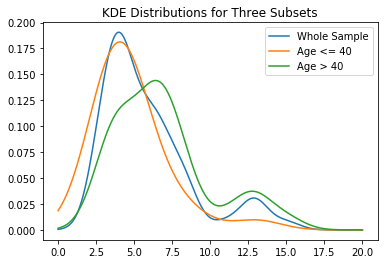

In [31]:
plt.figure()
plt.plot(pts, np.exp(logprob_all), label = "Whole Sample")
plt.plot(pts, np.exp(logprob_below_40), label = "Age <= 40")
plt.plot(pts, np.exp(logprob_above_40), label = "Age > 40")
plt.title("KDE Distributions for Three Subsets")
plt.legend()
plt.show()

In [32]:
#c

From the above graph, we can see a lot of useful information. First, the old individual group has a longer incubation period than the young individual group on average. And the peak of young individual group is arround 4 days with a smaller variance while the old individual group peaks at 5-7 days with a larger variance. And we notice there is a small peak at about 13 days in both young and old individual group.

Problem 2

In [34]:
#a
bq_data = np.loadtxt('BQ_probmat.txt', delimiter=',')

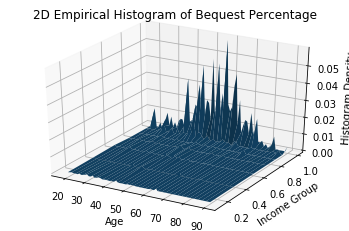

In [38]:
from mpl_toolkits.mplot3d import Axes3D

age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure()
ax = fig.gca(projection = "3d")
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title("2D Empirical Histogram of Bequest Percentage")
ax.set_xlabel("Age")
ax.set_ylabel("Income Group")
ax.set_zlabel("Histogram Density")
plt.show()

In [39]:
#b
bq_data2 = pd.read_csv("BQ_ind_data.txt")

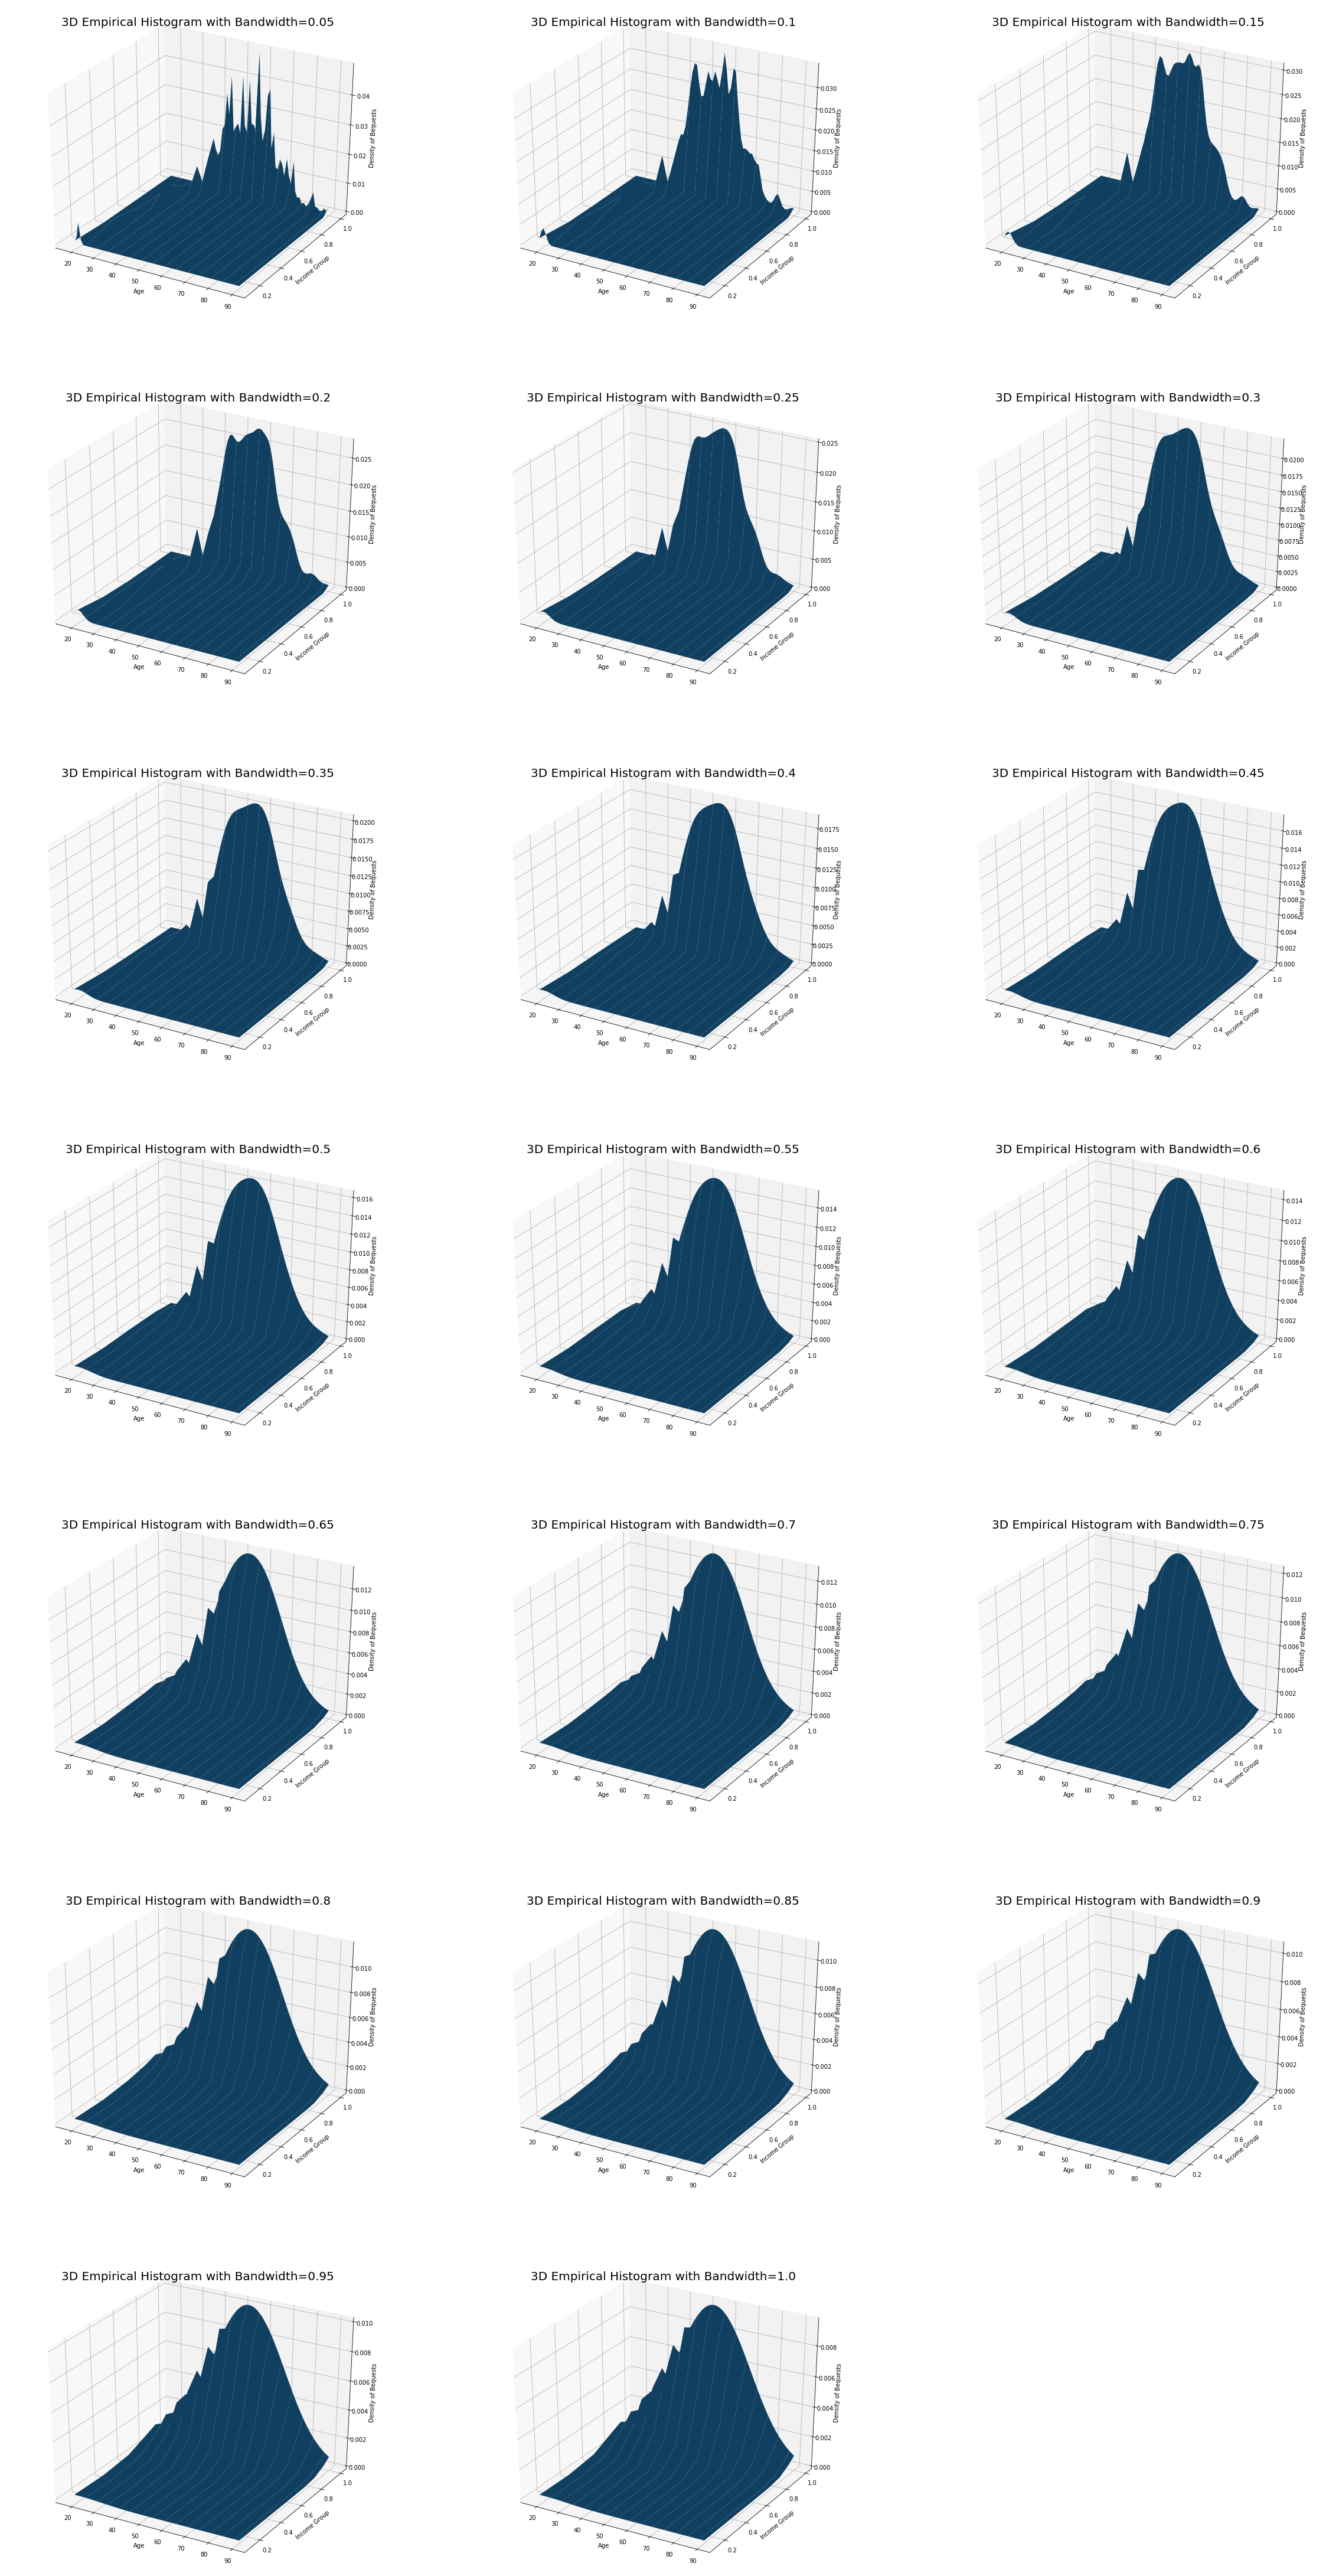

In [52]:
from scipy.stats import gaussian_kde

fig=plt.figure(figsize=(40,80))
gs = fig.add_gridspec(7, 3)
coords = np.vstack([item.ravel() for item in [age_mat, income_mat]])

bandwidth=0.0
for i in range(7):
    for j in range(3):
        bandwidth +=0.05
        kernel = gaussian_kde(bq_data2.T, bw_method=bandwidth)

        Z = np.reshape(kernel(coords), age_mat.shape)
        Z_scaled = Z / float(np.sum(Z))

        ax = fig.add_subplot(gs[i,j], projection='3d')
        ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
        ax.set_xlabel("Age")
        ax.set_ylabel("Income Group")
        ax.set_zlabel("Density of Bequests")
        ax.set_title('3D Empirical Histogram with Bandwidth={}'.format(round(bandwidth,2)),fontsize = 20)
        if bandwidth >= 1:
            break
    if bandwidth >= 1:
        break

As we can see from the above graphs, the best bandwidth will be 0.25. The histograms with larger bandwidths are too smooth to reflect some features of sample data, while the histograms with smaller bandwidths overfits the data without showing clear pattern.

Text(0.5, 0.92, '3D Empirical Histogram with Bandwidth = 0.25')

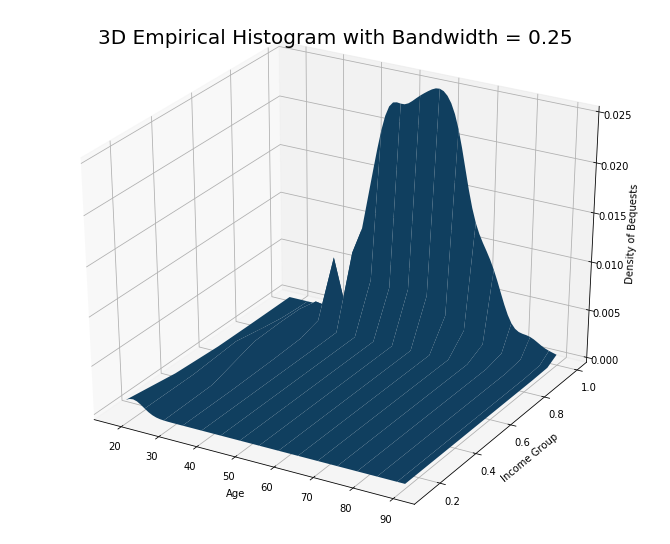

In [51]:
fig=plt.figure(figsize=(40,80))
kernel = gaussian_kde(bq_data2.T, bw_method = 0.25)

Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

ax = fig.add_subplot(gs[i,j], projection='3d')
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_xlabel("Age")
ax.set_ylabel("Income Group")
ax.set_zlabel("Density of Bequests")
ax.set_title('3D Empirical Histogram with Bandwidth = 0.25',fontsize = 20)

In [50]:
density = Z_scaled[61-18+1][5]
print("The estimated density for bequest recipents who are age 61 in the 6th lifetime income category is {}.".format(density))

The estimated density for bequest recipents who are age 61 in the 6th lifetime income category is 0.003360535254398306.
